<a href="https://colab.research.google.com/github/wil28/Object-Detection/blob/main/Fotball_Detection_roboflow_Yolo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install ultralytics==8.0.134 opencv-python==4.8.0.74 roboflow --quiet


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.3 MB/s eta 0:00:00


In [ ]:
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


#Download custom Dataset Roboflow by API

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="***")
# project = rf.workspace("smart-football-object-detection").project("smart-football-object-detection")
# dataset = project.version(11).download("yolov8")

In [ ]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2RLMJcfrH2WwN6dFd6HI")
project = rf.workspace("smart-football-object-detection").project("smart-football-object-detection")
version = project.version(11)
dataset = version.download("yolov8")
# https://universe.roboflow.com/ds/wUqYaRhx6m?key=cKA20y6kmV

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Smart-Football:-Object-Detection-11 in yolov8:: 100%|██████████| 25634/25634 [00:07<00:00, 3253.71it/s]


In [ ]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.134
    Uninstalling ultralytics-8.0.134:
      Successfully uninstalled ultralytics-8.0.134


#Train model

In [ ]:
!pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [ ]:
# %cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 153MB/s] 
New https://pypi.org/project/ultralytics/8.2.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Smart-Football:-Object-Detection-11/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

In [ ]:
!ls runs/detect/train/
#datasets/
#content/runs/detect/train/


args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1715850589.adcfaa6dcc50.2405.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


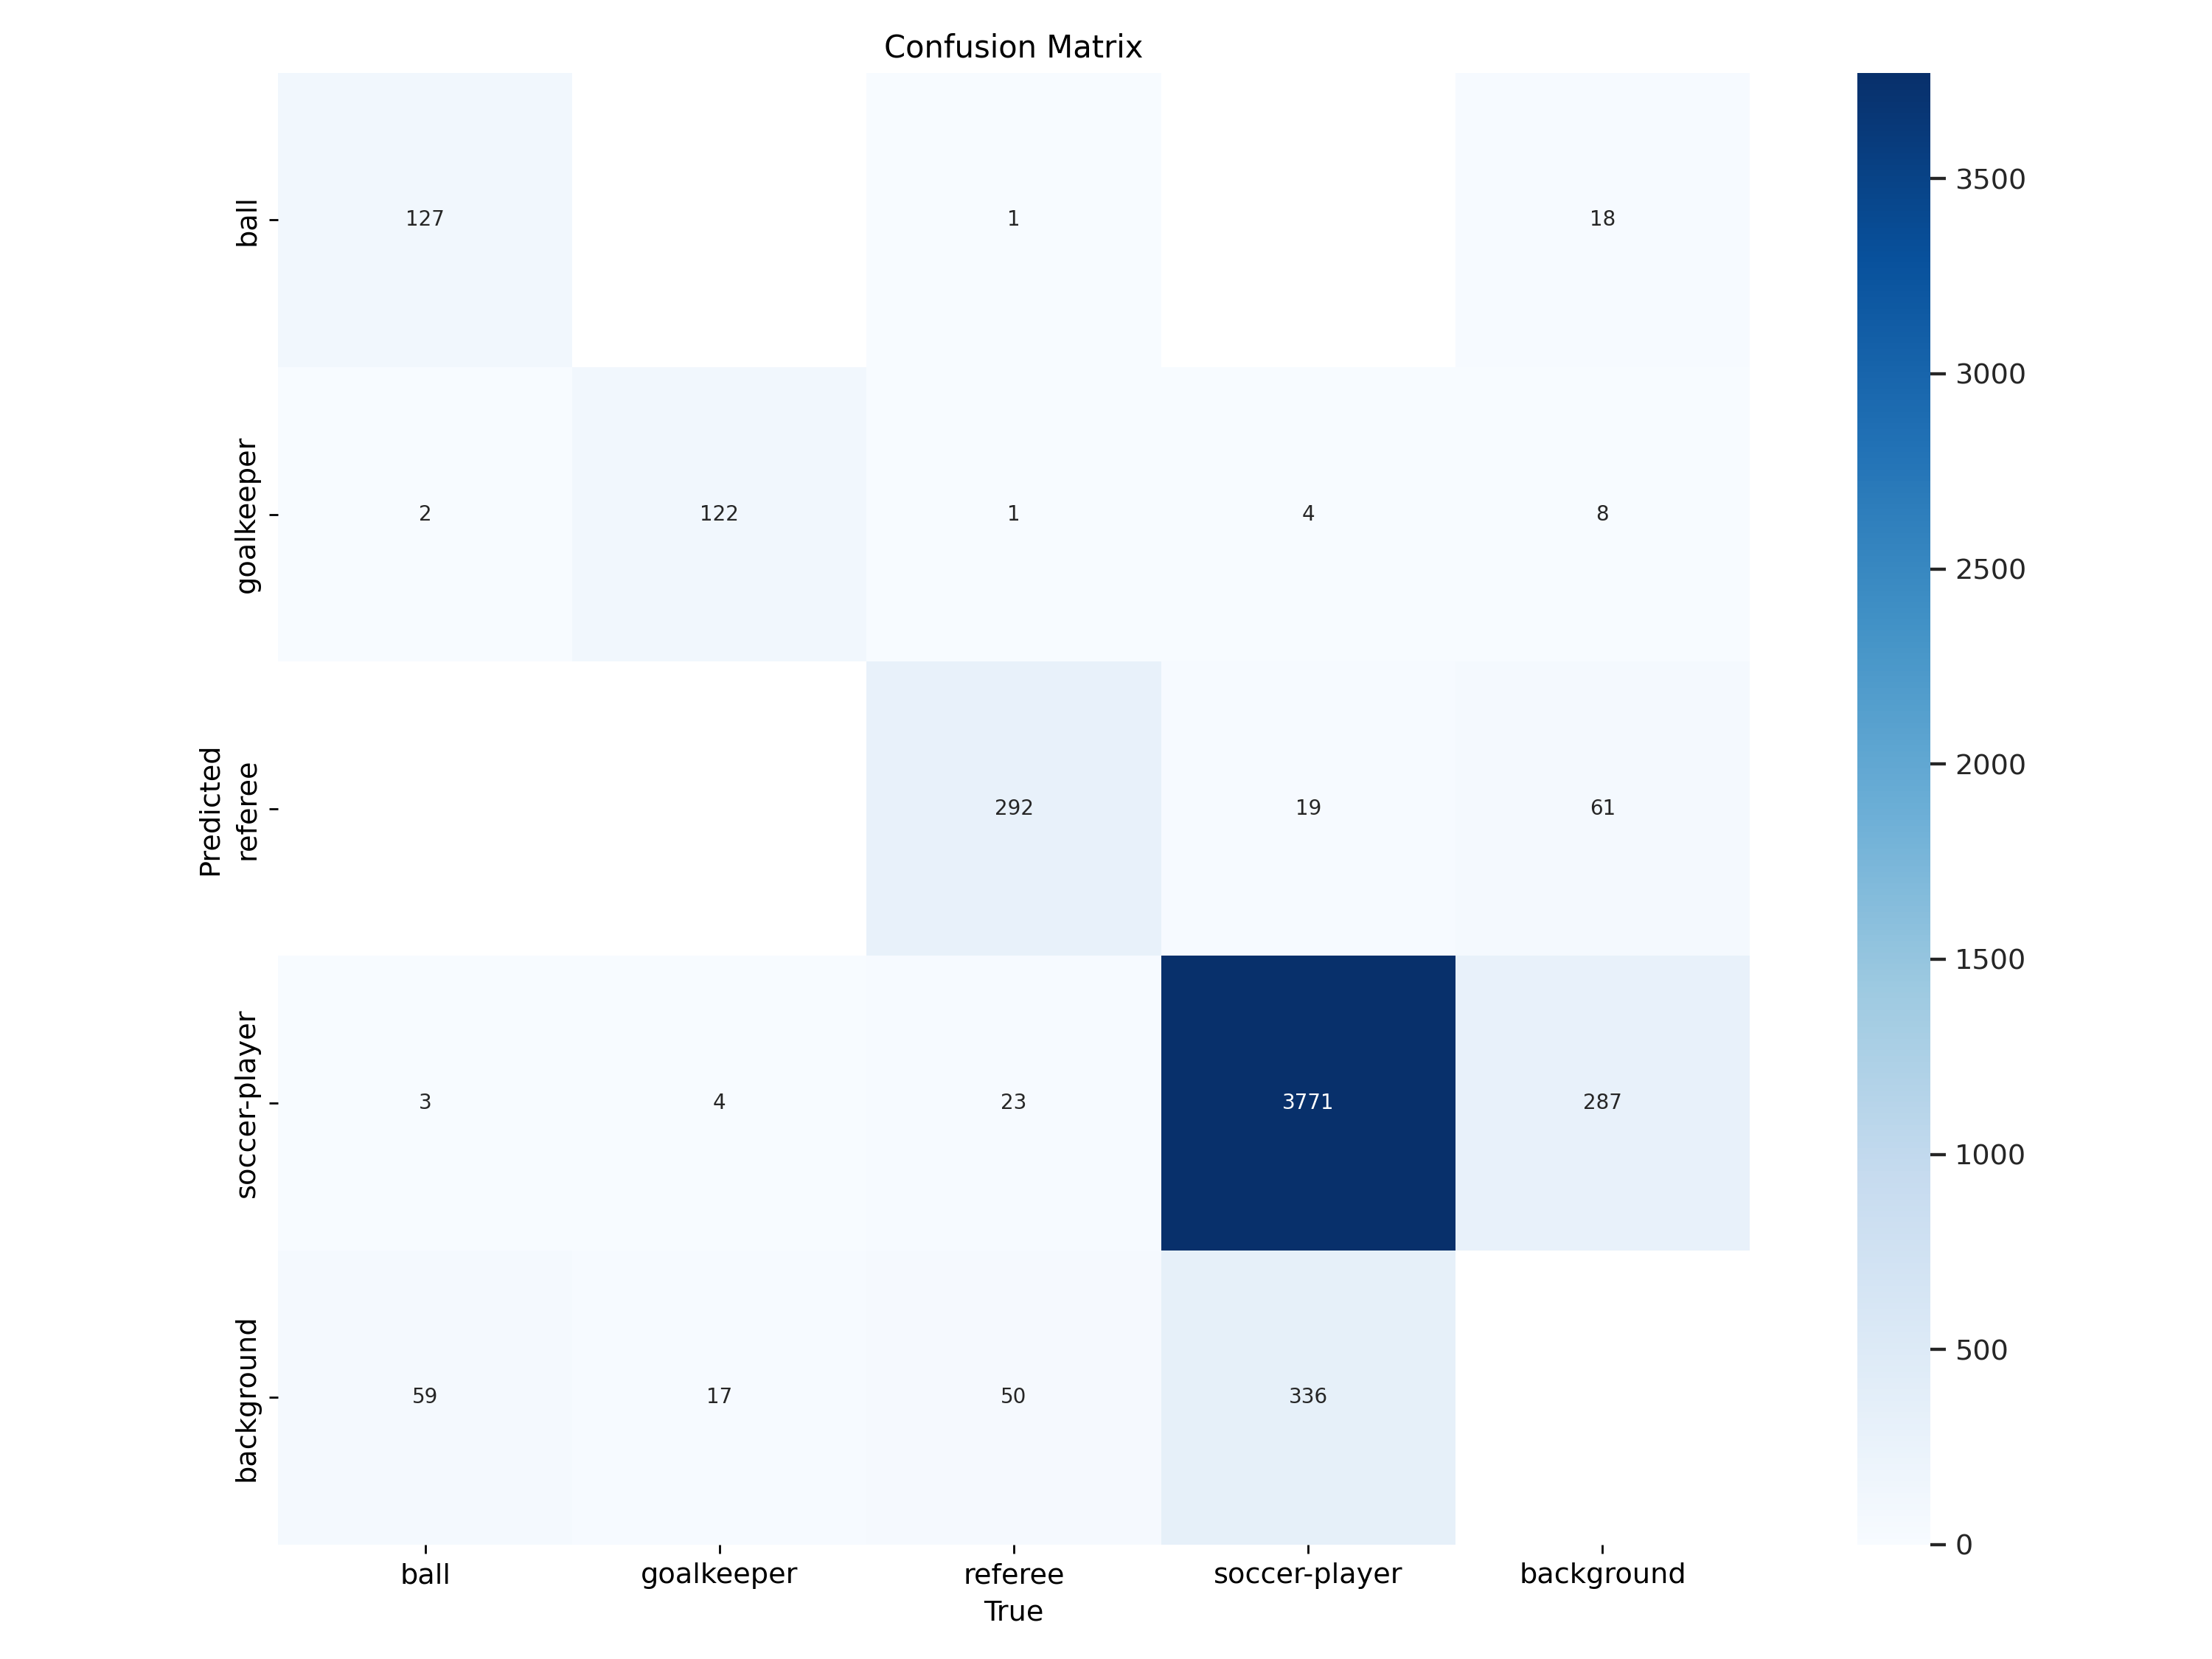

In [ ]:
# Confusion Matrix
Image(filename=f'/content/datasets/runs/detect/train/confusion_matrix.png', width=600)
# /content/runs/detect/train

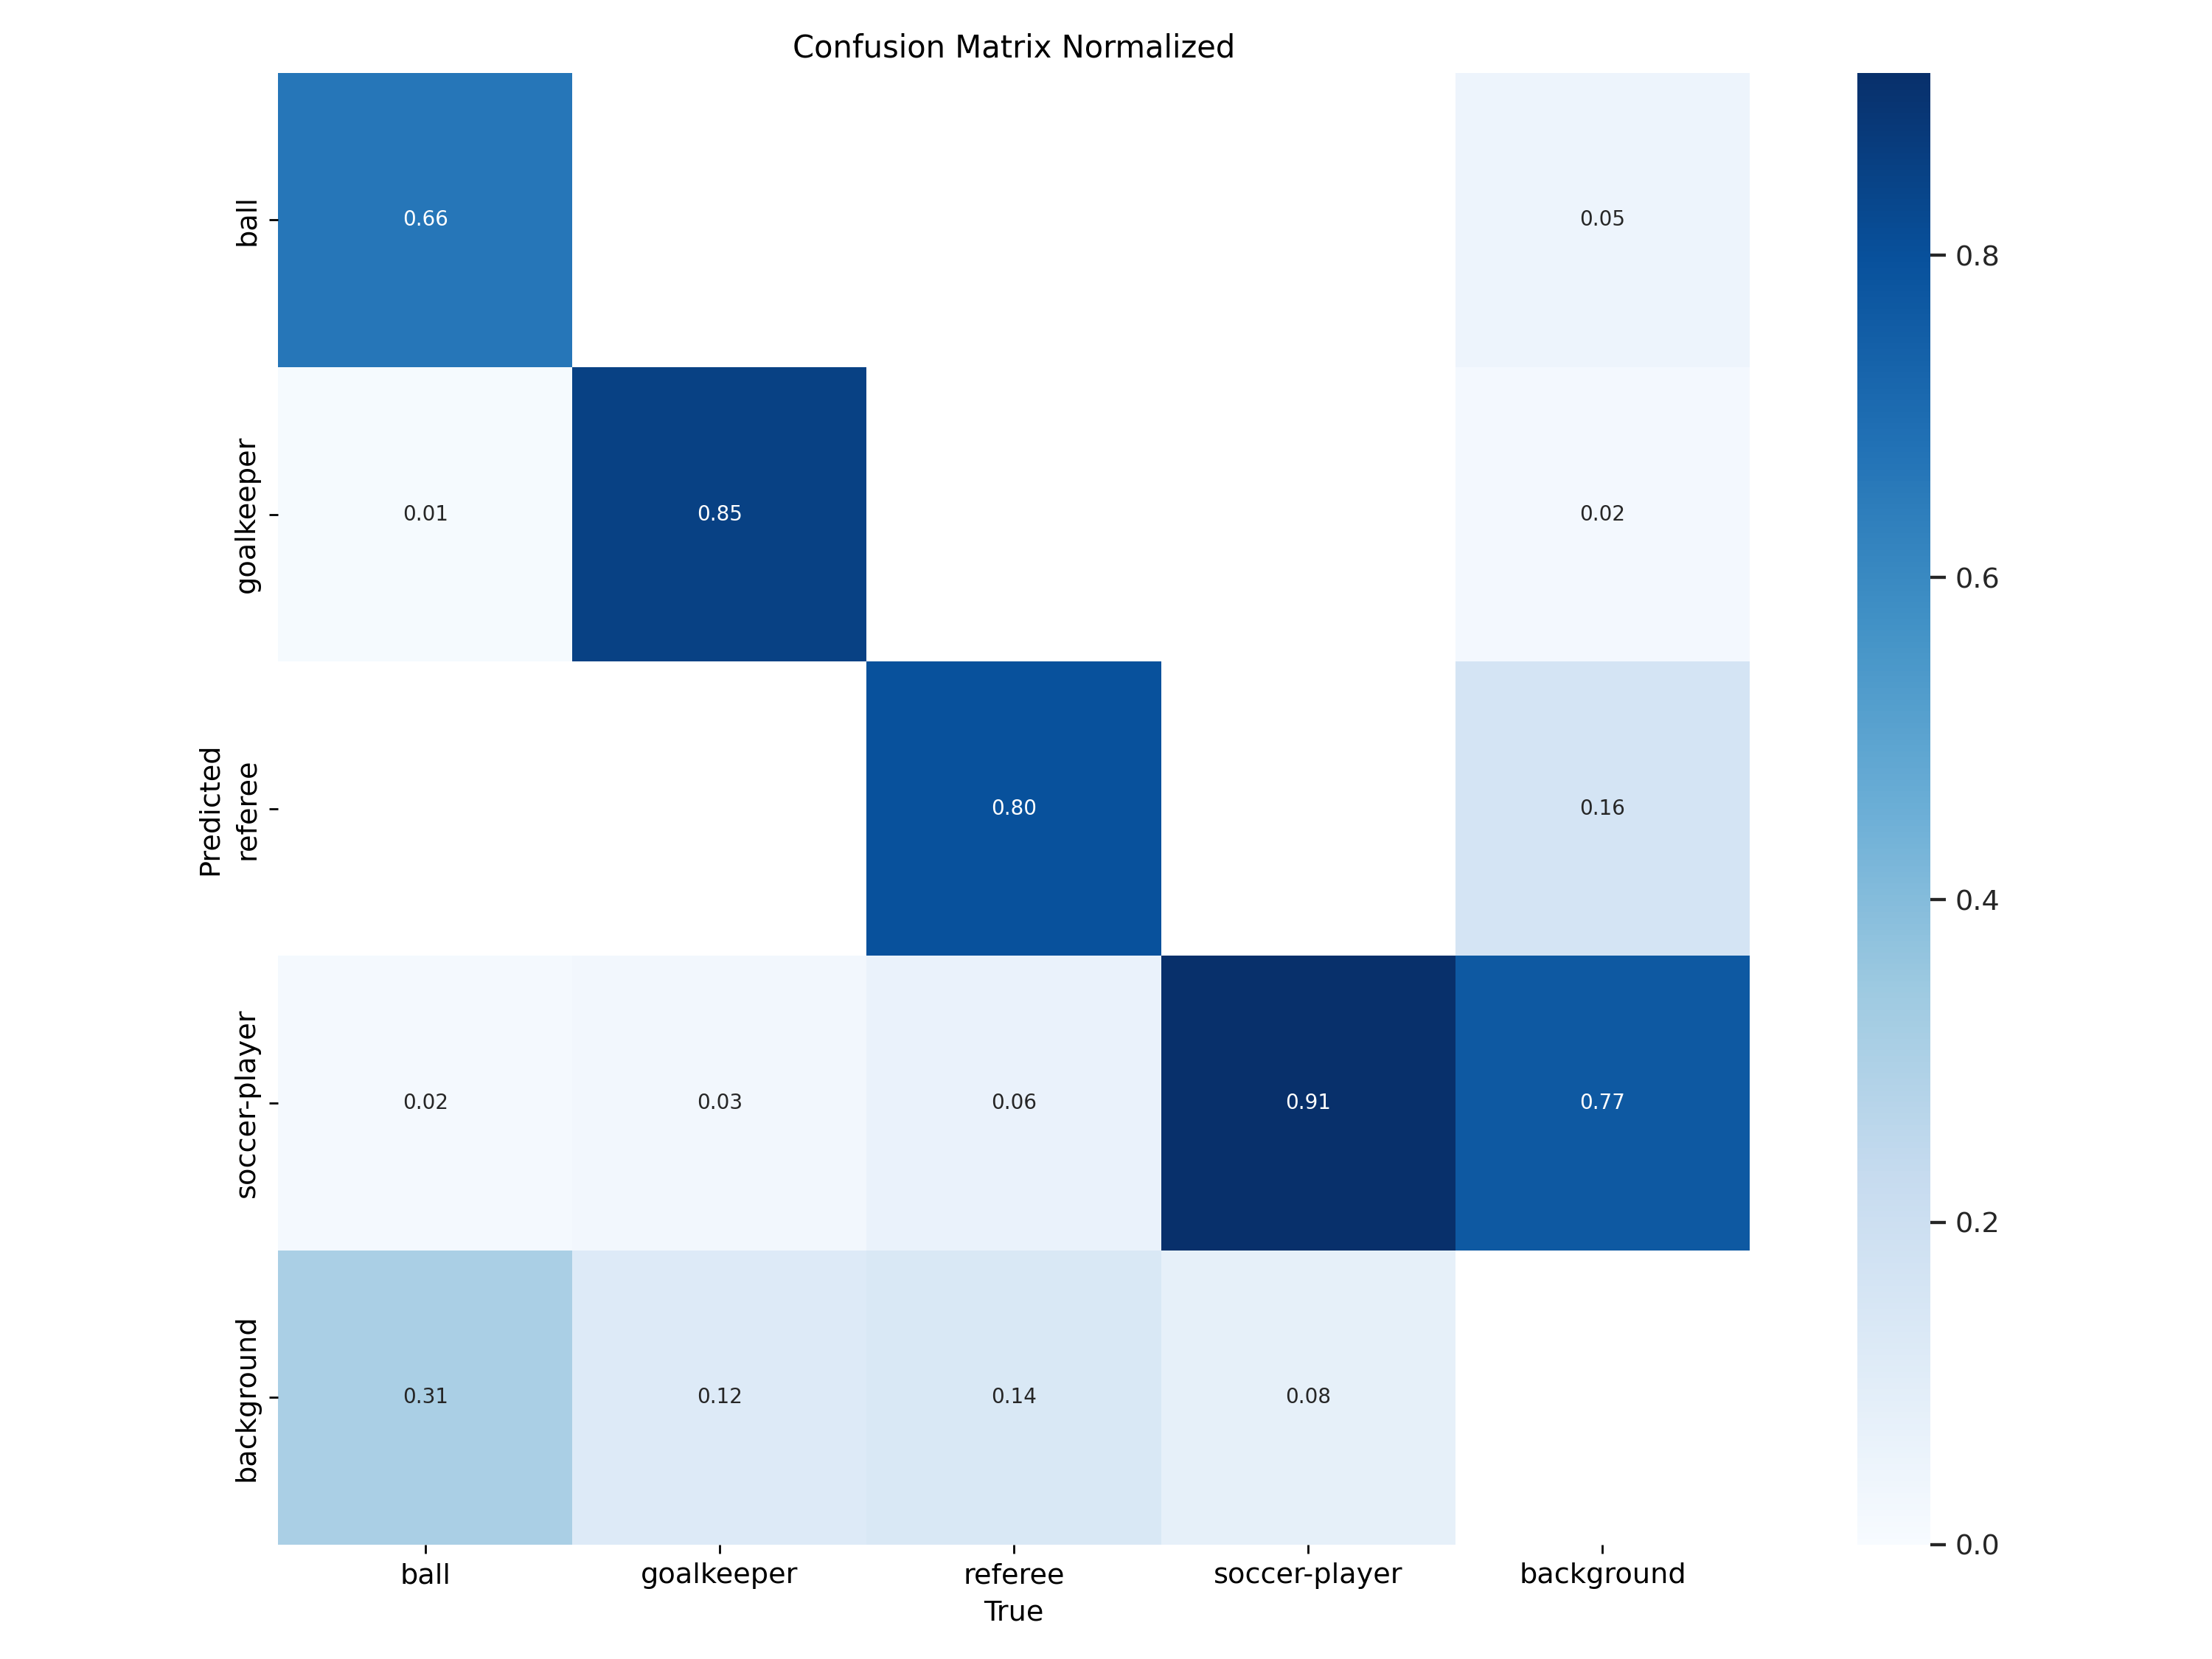

In [ ]:
# Confusion Matrix
Image(filename=f'/content/datasets/runs/detect/train/confusion_matrix_normalized.png', width=600)
# /content/runs/detect/train

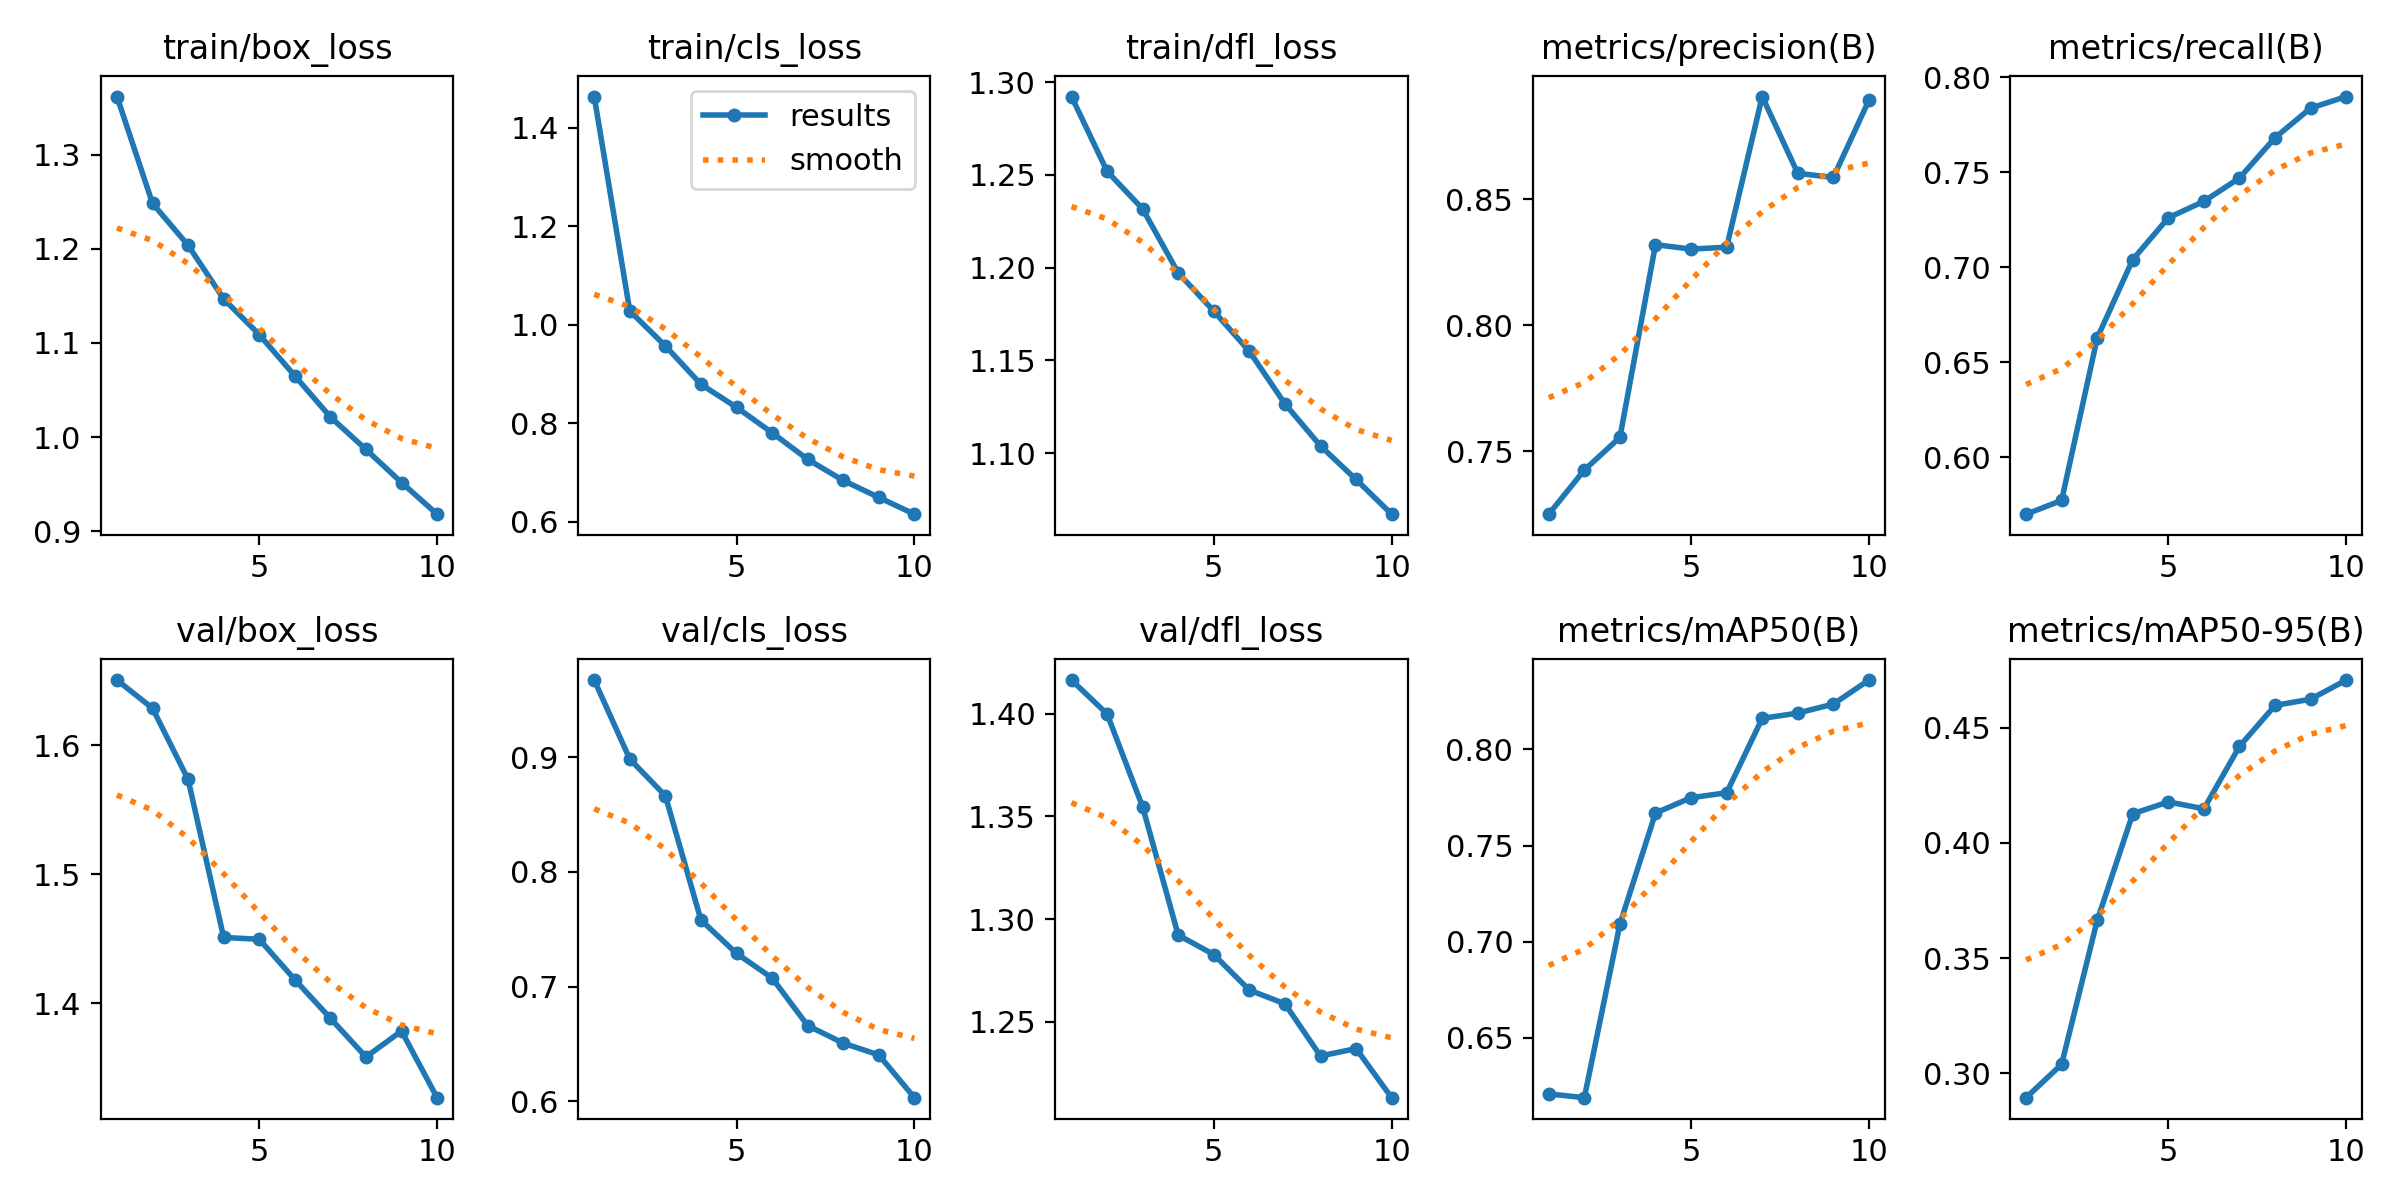

In [ ]:
Image(filename=f'/content/datasets/runs/detect/train/results.png', width=600)


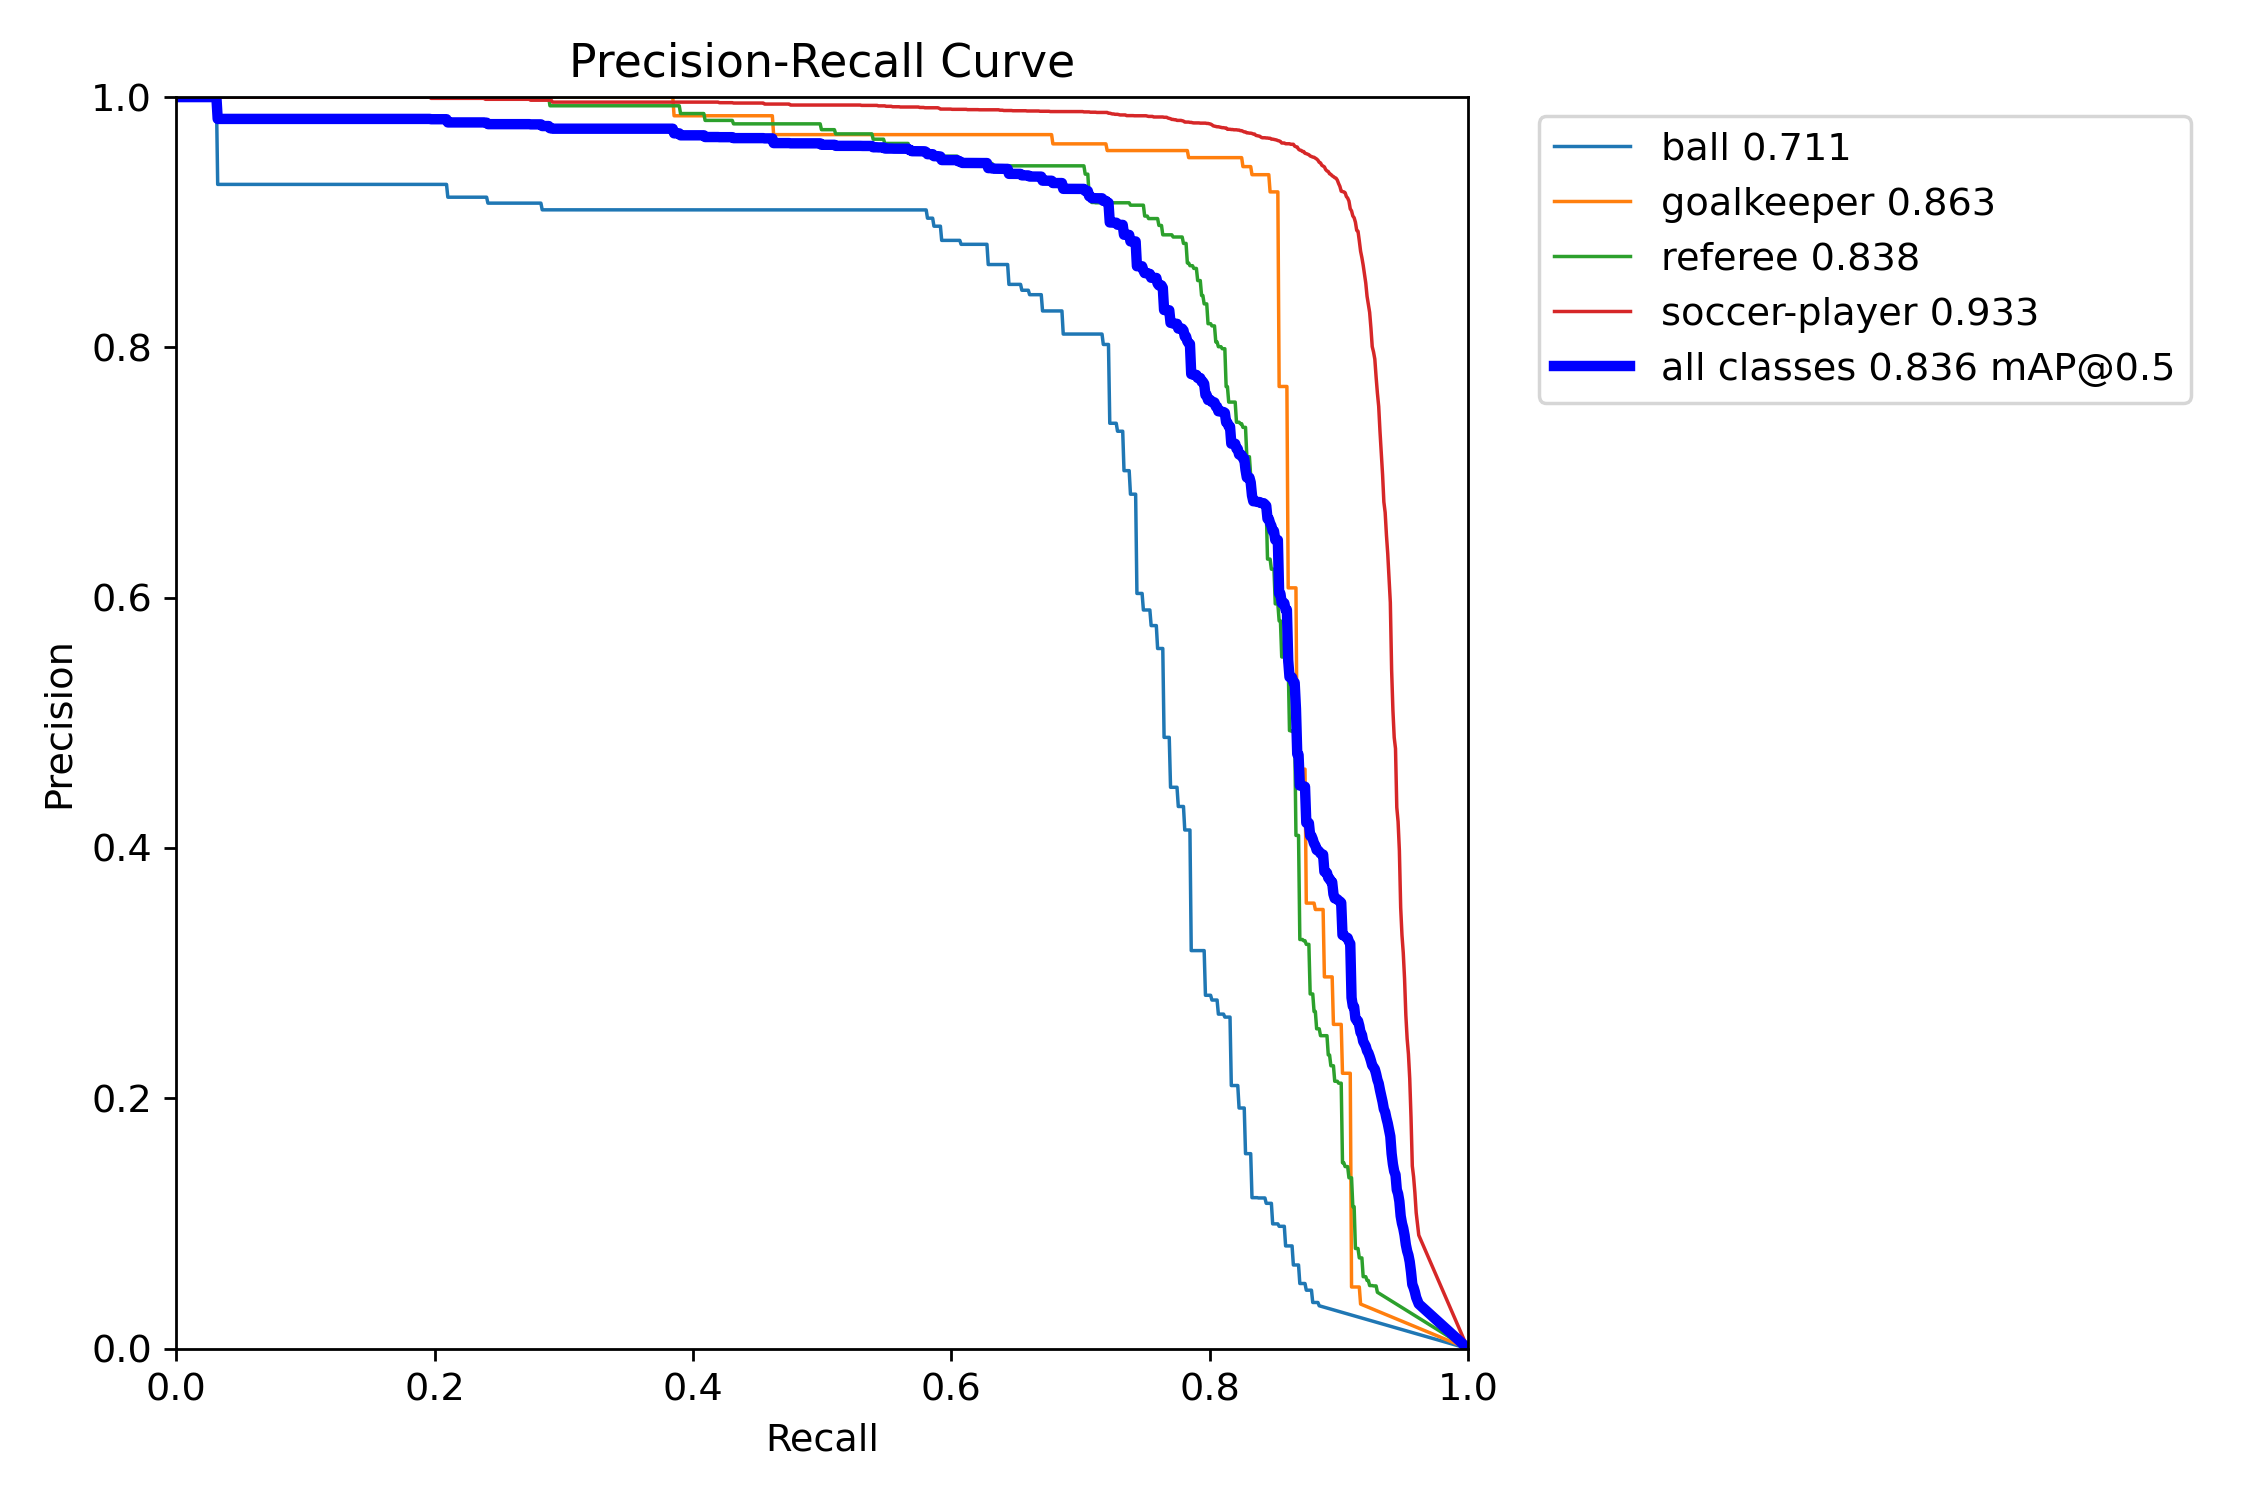

In [ ]:
Image(filename=f'/content/datasets/runs/detect/train/PR_curve.png', width=600)

#Validate custome model

In [ ]:
!yolo task=detect mode=val model=/content/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Smart-Football:-Object-Detection-11/valid/labels.cache... 1002 images, 41 backgrounds, 0 corrupt: 100% 1002/1002 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 63/63 [00:25<00:00,  2.50it/s]
                   all       1002       4831      0.892      0.787      0.838      0.471
                  ball       1002        191      0.878      0.602      0.717      0.258
            goalkeeper       1002        143      0.916      0.853      0.863      0.509
               referee       1002        367

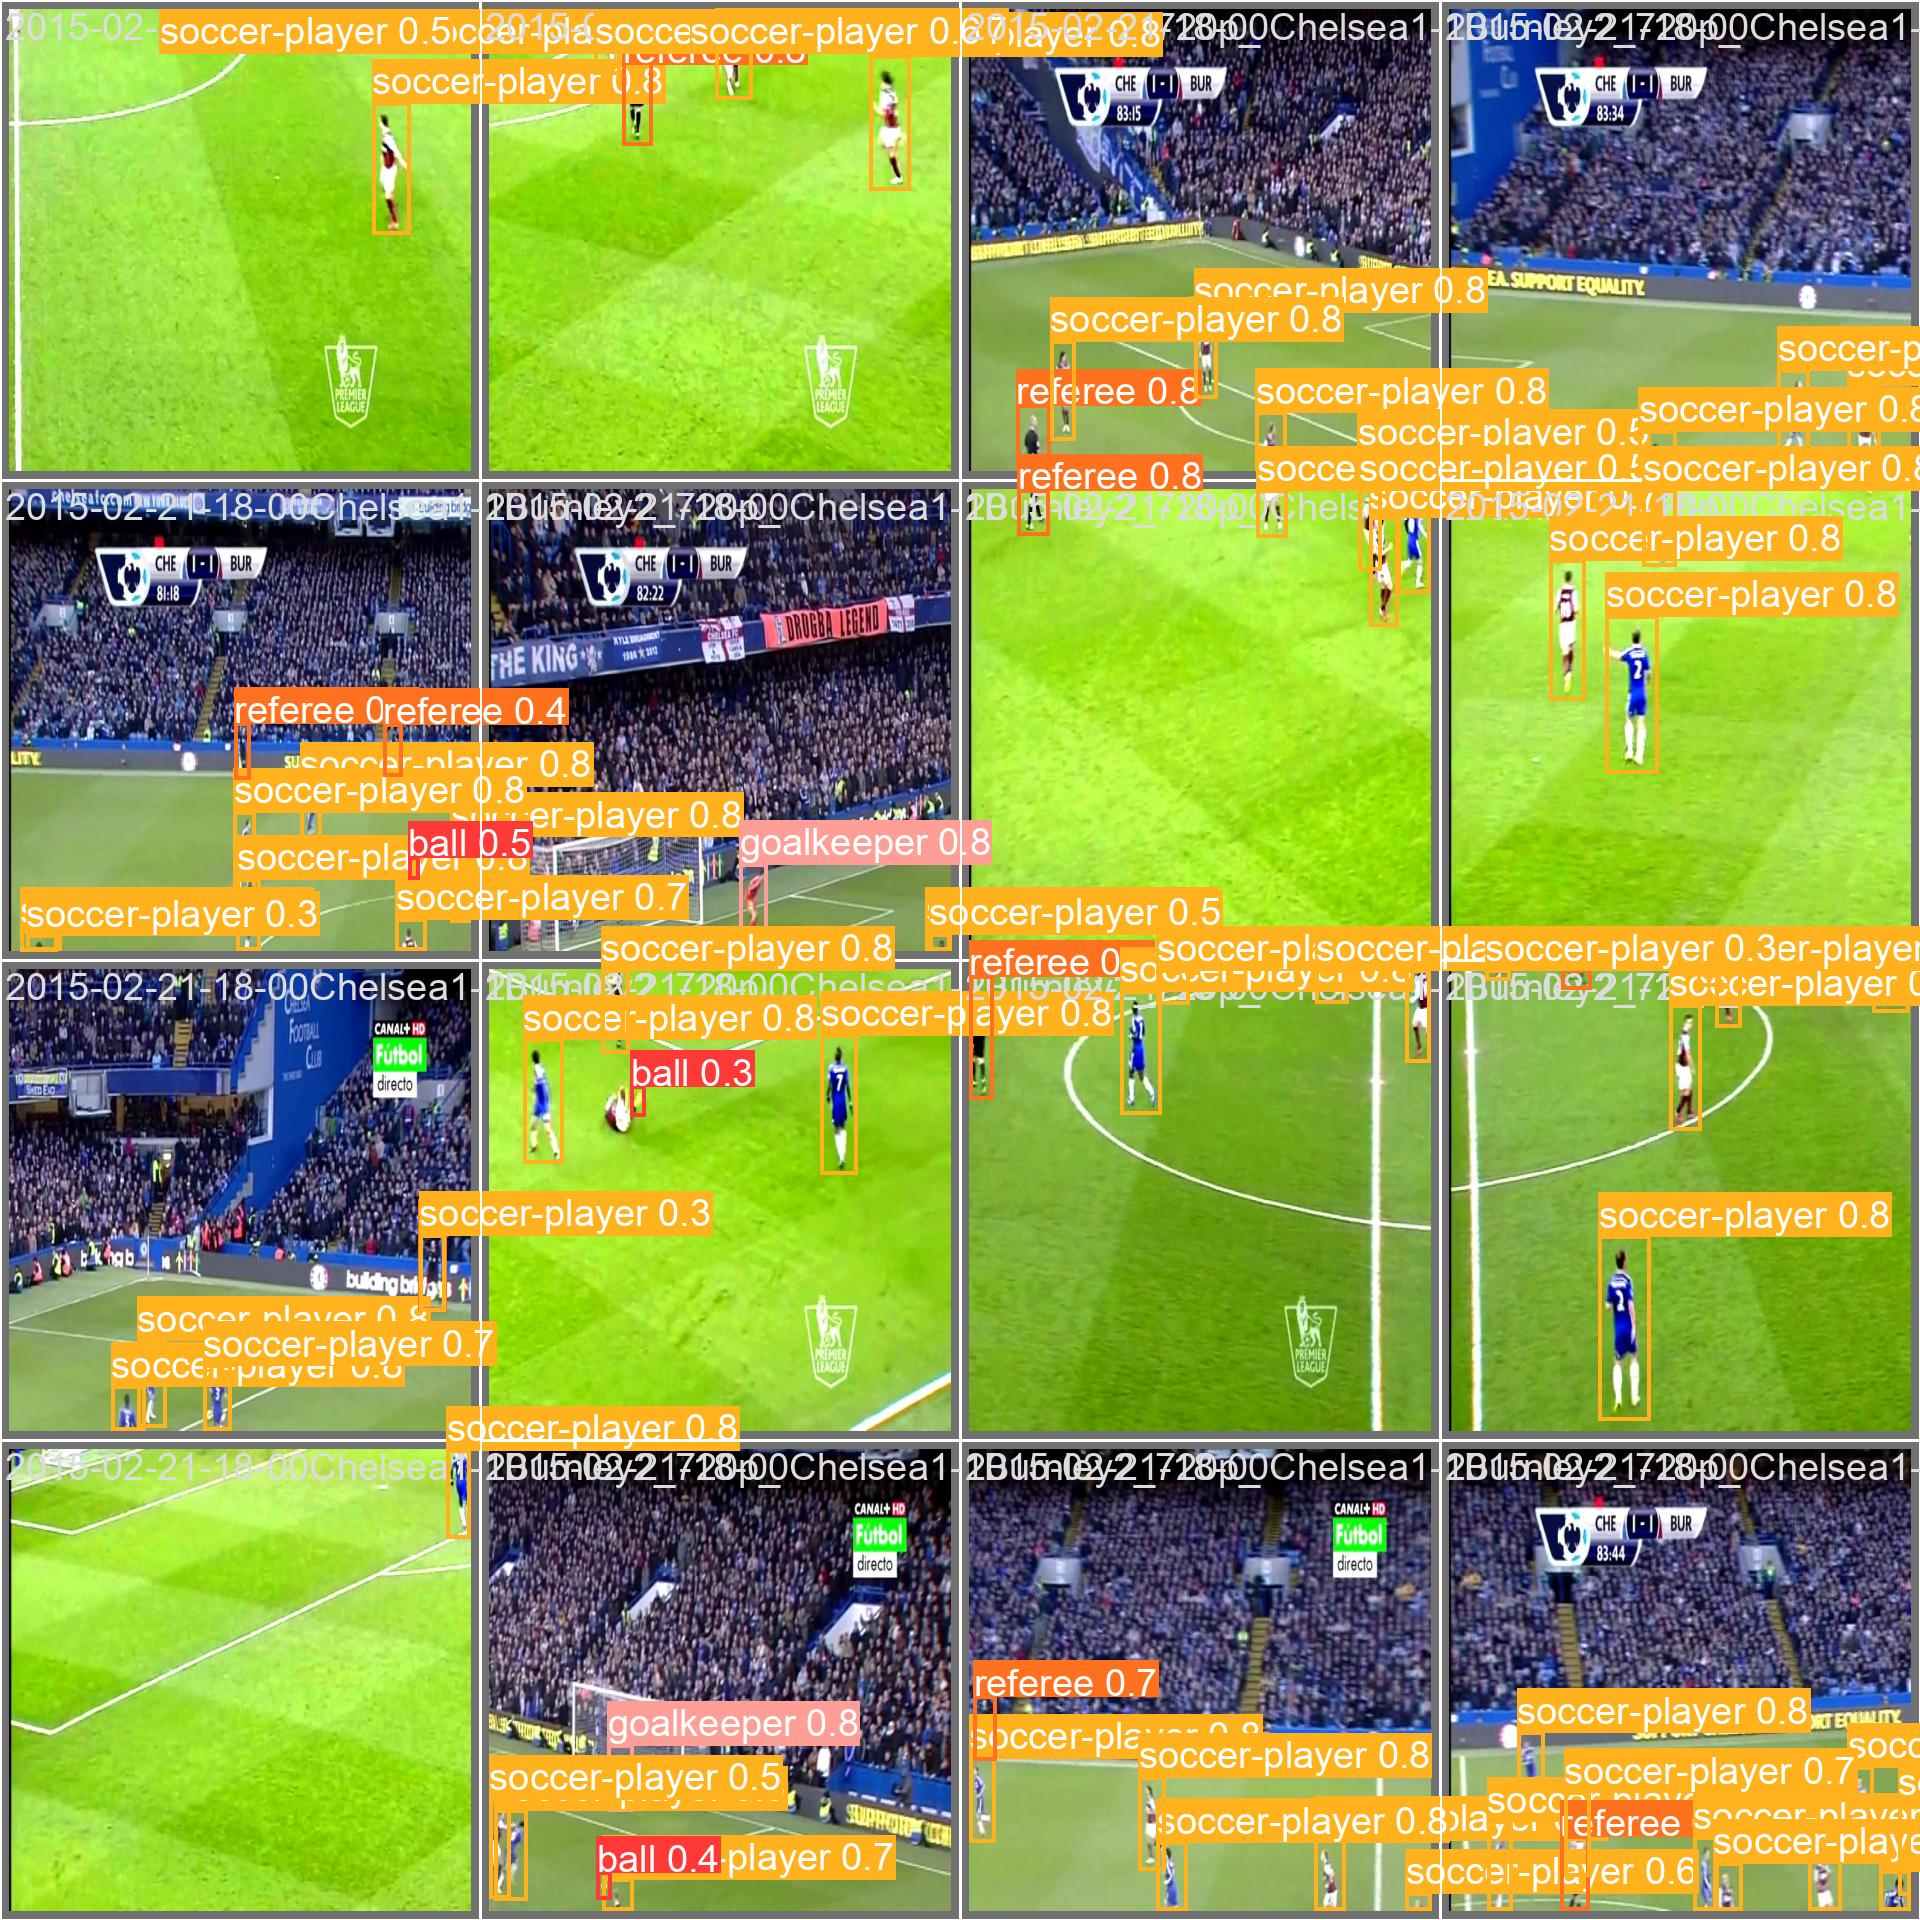

In [ ]:
# Examples of detections on the validation batch
Image(filename=f'/content/datasets/runs/detect/train/val_batch1_pred.jpg', width=600)

#Inference with Custom Model


In [ ]:
!yolo task=detect mode=predict model=/content/datasets/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0012_png.rf.3236d2a32881d864c3fd34cf18cde938.jpg: 800x800 1 goalkeeper, 4 soccer-players, 22.5ms
image 2/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0012_png.rf.369ea50ed15a39e7209fa1b79d95b497.jpg: 800x800 1 soccer-player, 22.5ms
image 3/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0012_png.rf.42500c742251d2a66fbce9bd954f1b05.jpg: 800x800 1 soccer-player, 22.4ms
image 4/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0012_png.rf.7ffc73f9ccc2903042afc93428cbefa7.jpg: 800x800 1 ball, 1 referee, 13 soccer-players, 22.4ms
image 5/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0016_p

In [ ]:
# visualize predictions on five instances of the test set
import glob

for image_path in glob.glob(f'/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

#Inference on a video

In [ ]:
from PIL import Image
from ultralytics import YOLO
import cv2

# Load a pretrained YOLOv8n model
model = YOLO('/content/datasets/runs/detect/train/weights/best.pt')

# Open the video file
cap = cv2.VideoCapture('/content/drive/MyDrive/Smart Football/morocco.mp4')

# Get the frame rate and size
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a video writer
out = cv2.VideoWriter('/content/drive/MyDrive/Smart Football/morocco_res.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# Loop over the frames
while cap.isOpened():
    # Read a frame
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference on the frame
    results = model(frame)

    # Plot the results on the frame
    im_array = results[0].plot()

    # Write the frame to the output file
    out.write(im_array)
    # Wait for a key press or end of video
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture, writer and destroy the window
cap.release()
out.release()

In [ ]:
!mv "/content/Smart-Football:-Object-Detection-11" "/content/drive/My Drive/Smart Football/"


In [ ]:
!mv "/content/datasets" "/content/drive/My Drive/Smart Football/"

In [ ]:
!mv "/content/runs" "/content/drive/My Drive/Smart Football/"

In [ ]:
!mv "/content/yolov8s.pt" "/content/drive/My Drive/Smart Football/"

In [ ]:
!mv "/content/datasets"  "/content/drive/My Drive/train2"